<a href="https://colab.research.google.com/github/lavatus/CS321/blob/main/ABSA_Hotel_v3_with_visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone -q https://github.com/DNThuan/AspectBasedSentimentAnalysis.git
!pwd
!ls

## 1) Read and visualize data 

###1.1 Read data

In [2]:
import numpy as np
import json
import pandas as pd

In [3]:
def read_data(path):
  with open(path) as f:
    data = f.read().split("\n\n")
  f.close()
  for i in range(len(data)):
    temp=data[i].split("\n")
    data[i]=temp[1:3]
  return data

###1.2 Visualize data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
colors = ['coral', 'dodgerblue', 'chartreuse']

####1.2.1 Draw a pie

In [341]:
def Draw_Pie(values, labels, name):
  plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
  plt.title(name)

####1.2.2 Count the labels

In [ ]:
def Split_Label_To_Count(labels):
  aspects = []
  opinions = []
  for each_label in labels:
    each_label = each_label.replace('{', '')
    each_label = each_label.replace('}', '')
    each_label = each_label.replace(' ', '')
    label_arr = each_label.split(',')
    aspect = [label_arr[i] for i in range(len(label_arr)) if i % 2 == 0]
    opinion = [label_arr[i] for i in range(len(label_arr)) if i % 2 != 0]
    aspects.append(aspect)
    opinions.append(opinion)
  return aspects, opinions

In [ ]:
#[positive, neutral, negative] = [0, 0, 0]
def Count_Aspect_And_Opinion(aspects, opinions):
  dictionary = {}
  for each_label_index in range(len(aspects)):
    for pos in range(len(aspects[each_label_index])):
      if opinions[each_label_index][pos] == 'positive':
        index = 0
      elif opinions[each_label_index][pos] == 'neutral':
        index = 1
      else: 
        index = 2
      aspect = aspects[each_label_index][pos]
      if aspect not in dictionary.keys():
        dictionary[aspect] = [0, 0, 0]
      dictionary[aspect][index] += 1
  return dictionary

####1.2.3 Labels statistics

In [334]:
def Convert_Labels_To_Dictionary(targets):
  aspect, polarity = Split_Label_To_Count(targets)
  dictionary = Count_Aspect_And_Opinion(aspect, polarity)
  return dictionary

In [330]:
def Count_Number_Of_Occurrences(targets, name):
  dictionary = Convert_Labels_To_Dictionary(targets)
  occurrences = [sum(item) for item in dictionary.values()]
  min_value = min(occurrences)
  max_value = max(occurrences)
  labels = list(dictionary.keys())
  plt.figure(figsize=(15, 15))
  plt.xlim(0, max_value)
  plt.barh(labels, occurrences, color=colors, height=0.5)
  plt.ylabel("Aspect")
  plt.xlabel('Occurrences')
  plt.title(name)
  plt.show()
  print("Label",labels[occurrences.index(min(occurrences))],"with min occurrences", min_value)
  print("Label",labels[occurrences.index(max(occurrences))],"with max occurrences", max_value)

####1.2.4 Opinion Polary statistics

In [350]:
def Count_The_Opinion_Polarity(dictionary, index):
  count = 0
  for item in dictionary.values():
    count += item[index]
  return count

In [351]:
def Count_Number_Of_Polarity(targets, name):
  dictionary = Convert_Labels_To_Dictionary(targets)
  count_pos = Count_The_Opinion_Polarity(dictionary, 0)
  count_neu = Count_The_Opinion_Polarity(dictionary, 1)
  count_neg = Count_The_Opinion_Polarity(dictionary, 2)
  opinion_polarity = [count_pos, count_neu, count_neg]
  polarity_lables = ['positive', 'neutral', 'negative']
  Draw_Pie(opinion_polarity, polarity_lables, name)

#2) Preprocessing data

In [4]:
!pip install -q emoji


     |████████████████████████████████| 170 kB 27.1 MB/s 


In [5]:
from sklearn.preprocessing import  FunctionTransformer
import emoji
import re

## 2.1 Review data

In [6]:
def Lower_text(texts):

  for i in range(len(texts)):
    texts[i]=texts[i].lower()
  return texts
lower_text = FunctionTransformer(Lower_text)

### 2.1.1 Delete emoji

In [7]:
def Delete_emoji(texts):
    return np.array([emoji.get_emoji_regexp().sub('', text) for text in texts])

delete_emoji = FunctionTransformer(Delete_emoji)

### 2.1.2 Replace value of money by special character

In [8]:
def Replace_Symbol(texts):
  texts_result = []
  for text in texts:
    distance_pattern = "([0-9.,]{1,9}?.km)|([0-9.,]{1,9}?.cây số)|([0-9.,]{1,9}?.cây)|([0-9.,]{1,9}?.mét)|([0-9.,]{1,3}?.m)"
    text_result = re.sub(distance_pattern, 'khoang_cach', text)
    money_pattern = "(\d{1,3}k.{0})|([0-9.]{1,9}?.vnd)|([0-9.]{1,9}?.việt nam đồng)|([0-9.]{1,9}?.đồng)"
    text_result = re.sub(money_pattern, 'gia_tien', text_result)
    texts_result.append(text_result)
  return texts_result
replace_symbol = FunctionTransformer(Replace_Symbol)

### 2.1.3 Delete special character

In [9]:
def Delete_Special_Character(texts):
  texts_result = []
  for text in texts:
    special_character_pattern = "[+=<>@#$%^&~]"
    text_result = re.sub(special_character_pattern, '', text)
    words = text_result.split()
    text_result = ' '.join(words)
    texts_result.append(text_result)
  return texts_result
delete_special_character = FunctionTransformer(Delete_Special_Character)

### 2.1.4 Normalize elongate words

In [10]:
def Normalize_Elongate_Words(texts):
  texts_result = []
  for text in texts:
    elongate_pattern = r"(\w)\1*"
    text_result = re.sub(elongate_pattern, r'\1', text)
    texts_result.append(text_result)
  return texts_result
normalize_elongate_words = FunctionTransformer(Normalize_Elongate_Words)

### 2.1.5 Replace negative words

In [11]:

def Replace_Negative_Words(texts):
  texts_result = []
  for text in texts:

    hotel_pattern = r"\bksạn\b|\bk sạn\b|\bks\b|\bKS\b|\bKs\b"
    new = re.sub(hotel_pattern, 'khách sạn', text)
    new = re.sub(r"\bnc\b", 'nước', new)
    new = re.sub(r"\bnvs\b|\bnhà vs\b", 'nhà vệ sinh', new)
    new = re.sub(r"\bnv\b", 'nhân viên', new)
    new = re.sub(r"\bvs\b", 'vệ sinh', new)
    
    negative_pattern = r"\bkh\b|\bko\b|\bkhg\b|\bkhong\b|\bk\b|\bhông\b|\bhem\b|\bk0\b"
    new = re.sub(negative_pattern, 'không', new)
    new = re.sub(r"\bdc\b|\bdk\b", 'được', new)

    new = re.sub(r" 1 ", " một ", new)

    texts_result.append(new)
  return texts_result
replace_negative_words = FunctionTransformer(Replace_Negative_Words)

### 2.1.6 Pos tagging

In [12]:
!pip install pyvi
from pyvi import ViTokenizer, ViPosTagger

     |████████████████████████████████| 8.5 MB 31.1 MB/s 
     |████████████████████████████████| 743 kB 49.1 MB/s 


In [13]:
def Tiken_Postag(texts):
  result = []
  for text in texts:
    postag =  ViPosTagger.postagging(ViTokenizer.tokenize(text))
    result.append(postag)
  return np.array(result,dtype=object)
token_postag = FunctionTransformer(Tiken_Postag)

## 2.2 Tag data

### 2.2.1 Label separation

In [14]:
# Input: một nhãn dạng string
def find_start_end(label):
  start = 0
  end = 0
  lst_start=[]
  lst_end=[]
  for index ,char in enumerate(label):
    if char == "{":
      start = index
      lst_start.append(start)
    elif char == "}":
      end = index
      lst_end.append(end)
  return tuple(zip(lst_start,lst_end))

In [15]:
def Label_to_ListDict(labels):
  list_dict_label = list()
  for label in labels:
    lst = []
    index = tuple(find_start_end(label))
    for i in index:
      dict_label = dict()
      aspect, polarity = label[i[0]+1:i[1]].replace(" ","").split(",")
      dict_label[aspect] = polarity
      lst.append(dict_label)
    list_dict_label.append(lst)
  return list_dict_label

In [16]:
def Label_str_to_list(label):
  index = tuple(find_start_end(label))
  aspect_temp=[]
  polarity_temp=[]
  for i in index:
    temp = label[i[0]+1:i[1]].replace(" ","").split(",")
    aspect_temp.append(temp[0])
    polarity_temp.append(temp[1])
  return aspect_temp, polarity_temp

In [17]:
def separate_label(labels):
  aspect= []
  polarity = []
  SA = []
  for label in labels:
    temp = Label_str_to_list(label)
    aspect.append(temp[0])
    polarity.append(temp[1])

    sa_temp= []
    for i in range(len(temp[0])):
      sa = "{"+temp[0][i]+", "+temp[1][i]+"}"
      sa_temp.append(sa)
    SA.append(sa_temp)

  return np.array(aspect, dtype=object), np.array(polarity, dtype=object), np.array(SA, dtype=object)

### 2.2.2 Binary Label

In [18]:
# Load list label

def read_label(path):
  with open(path) as f:
    data = json.load(f)
  f.close()
  return data

aspect_path = "/content/AspectBasedSentimentAnalysis/Label/aspect.json"
SA_path = "/content/AspectBasedSentimentAnalysis/Label/SA.json"
aspect_labels = read_label(aspect_path)
AS_labels = read_label(SA_path)

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer,StandardScaler
transform_label= MultiLabelBinarizer().fit([aspect_labels])
list_label = transform_label.classes_
print(list_label)

['FACILITIES#CLEANLINESS' 'FACILITIES#COMFORT'
 'FACILITIES#DESIGN&FEATURES' 'FACILITIES#GENERAL'
 'FACILITIES#MISCELLANEOUS' 'FACILITIES#PRICES' 'FACILITIES#QUALITY'
 'FOOD&DRINKS#MISCELLANEOUS' 'FOOD&DRINKS#PRICES' 'FOOD&DRINKS#QUALITY'
 'FOOD&DRINKS#STYLE&OPTIONS' 'HOTEL#CLEANLINESS' 'HOTEL#COMFORT'
 'HOTEL#DESIGN&FEATURES' 'HOTEL#GENERAL' 'HOTEL#MISCELLANEOUS'
 'HOTEL#PRICES' 'HOTEL#QUALITY' 'LOCATION#GENERAL' 'ROOMS#CLEANLINESS'
 'ROOMS#COMFORT' 'ROOMS#DESIGN&FEATURES' 'ROOMS#GENERAL'
 'ROOMS#MISCELLANEOUS' 'ROOMS#PRICES' 'ROOMS#QUALITY'
 'ROOM_AMENITIES#CLEANLINESS' 'ROOM_AMENITIES#COMFORT'
 'ROOM_AMENITIES#DESIGN&FEATURES' 'ROOM_AMENITIES#GENERAL'
 'ROOM_AMENITIES#MISCELLANEOUS' 'ROOM_AMENITIES#PRICES'
 'ROOM_AMENITIES#QUALITY' 'SERVICE#GENERAL']


In [20]:
transform_label_SA= MultiLabelBinarizer().fit([AS_labels])
#print(transform_label_SA.classes_)

In [21]:
def show_label_aspect(pred_aspect,list_label):
  labels = []
  for pre in pred_aspect:
    temp = []
    for i, value in enumerate(pre):
      if value == 1:
        temp.append(list_label[i])
    labels.append(temp)
  return labels

In [22]:
def show_label_SA(pred_as, pred_pos, pred_neg, pred_neu):
  labels = []
  for index, value in enumerate(pred_as):
    if value == 1:
      label = "{"
      if pred_pos[index] ==1:
        label += str(list_label[index])+", "+"positive"
      elif pred_neg[index] ==1:
        label += str(list_label[index])+", "+"negative"
      elif pred_neu[index] ==1:
        label += str(list_label[index])+", "+"neutral"
      label+="}"
      labels.append(label)
  return labels

## 2.3 Make dataFrame

In [23]:

def data_Frame(label_y):
  aspect, polarity,_ =  separate_label(label_y)
  dic = Label_to_ListDict(label_y)
  aspect_tf = transform_label.transform(aspect)

  for index1,label in enumerate(aspect_tf):
    count = 0
    for index2,a in enumerate(label):
      if a == 1:
        if polarity[index1][count] == "positive":
          aspect_tf[index1][index2] = 10
         
        elif polarity[index1][count] == "negative":
          aspect_tf[index1][index2] = 20
    
        else:
          aspect_tf[index1][index2] = 30
        count+=1

  return aspect_tf

In [24]:
def make_data_frame(texts,labels,list_label):
  data = {"Review":texts}
  df = pd.DataFrame(data)

  label = data_Frame(labels)
  for i in range(len(aspect_labels)):
    new_col = label[:,i]
    df[transform_label.classes_[i]] = new_col.tolist()
  return df

### 2.3.1 Aspect dataFrame

In [25]:
def get_aspect_data_frame(df,list_label):
    df_ =df.copy()
    for aspect in aspect_labels:
        df_[aspect]=df_[aspect].replace(10,1)
        df_[aspect]=df_[aspect].replace(20,1)
        df_[aspect]=df_[aspect].replace(30,1)
    df_ = df_.fillna(0)
    return df_

### 2.3.2 Positive dataFrame

In [26]:
def get_positive_data_frame(df,list_label):
    df_ =df.copy()
    for aspect in aspect_labels:
        df_[aspect]=df_[aspect].replace(10,1)
        df_[aspect]=df_[aspect].replace(20,0)
        df_[aspect]=df_[aspect].replace(30,0)
    df_ = df_.fillna(0)
    return df_

### 2.3.3 Negative dataFrame

In [27]:
def get_negative_data_frame(df,list_label):
    df_ =df.copy()
    for aspect in aspect_labels:
        df_[aspect]=df_[aspect].replace(10,0)
        df_[aspect]=df_[aspect].replace(20,1)
        df_[aspect]=df_[aspect].replace(30,0)
    df_ = df_.fillna(0)
    return df_

### 2.3.4 Neutral dataFrame

In [28]:
def get_neutral_data_frame(df,list_label):
    df_ =df.copy()
    for aspect in aspect_labels:
        df_[aspect]=df_[aspect].replace(10,0)
        df_[aspect]=df_[aspect].replace(20,0)
        df_[aspect]=df_[aspect].replace(30,1)
    df_ = df_.fillna(0)
    return df_

In [29]:
def getdata(df,list_label,kind):
  if kind == "aspect":
    data = get_aspect_data_frame(df,list_label)
  elif kind == "positive":
    data= get_positive_data_frame(df,list_label)
  elif kind =="negative":
    data = get_negative_data_frame(df,list_label)
  elif kind =="neutral":
    data = get_neutral_data_frame(df,list_label)  

  X = data.Review
  y = data.drop("Review",1)
  return X,y

# 3) Training

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## 3.1 Get data

In [56]:
path_train = "/content/AspectBasedSentimentAnalysis/VLSP2018_SA_Hotel/1-VLSP2018-SA-Hotel-train (7-3-2018).txt"
path_dev =  "/content/AspectBasedSentimentAnalysis/VLSP2018_SA_Hotel/2-VLSP2018-SA-Hotel-dev (7-3-2018).txt"
path_test = "/content/AspectBasedSentimentAnalysis/VLSP2018_SA_Hotel/3-VLSP2018-SA-Hotel-test (8-3-2018).txt"

train = np.array(read_data(path_train))
dev = np.array(read_data(path_dev))
test = np.array(read_data(path_test))

print("Train: ",train.shape)
print("Dev: ",dev.shape)
print("Test: ",test.shape)


Train:  (3000, 2)
Dev:  (2000, 2)
Test:  (600, 2)


In [57]:
X_train, y_train = train[:,0], train[:,1]
X_dev,   y_dev   = dev[:,0],   dev[:,1]
X_test,  y_test  = test[:,0],  test[:,1]

##3.2 Visualizing data

###3.2.1 The train-dev-test size

In [273]:
size = [X_train.shape[0], X_dev.shape[0], X_test.shape[0]]
labels = ['Train', 'Dev', 'Test']

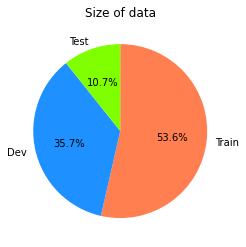

In [342]:
Draw_Pie(size, labels, "Size of data")

###3.2.2 Number of occurrences of each aspects

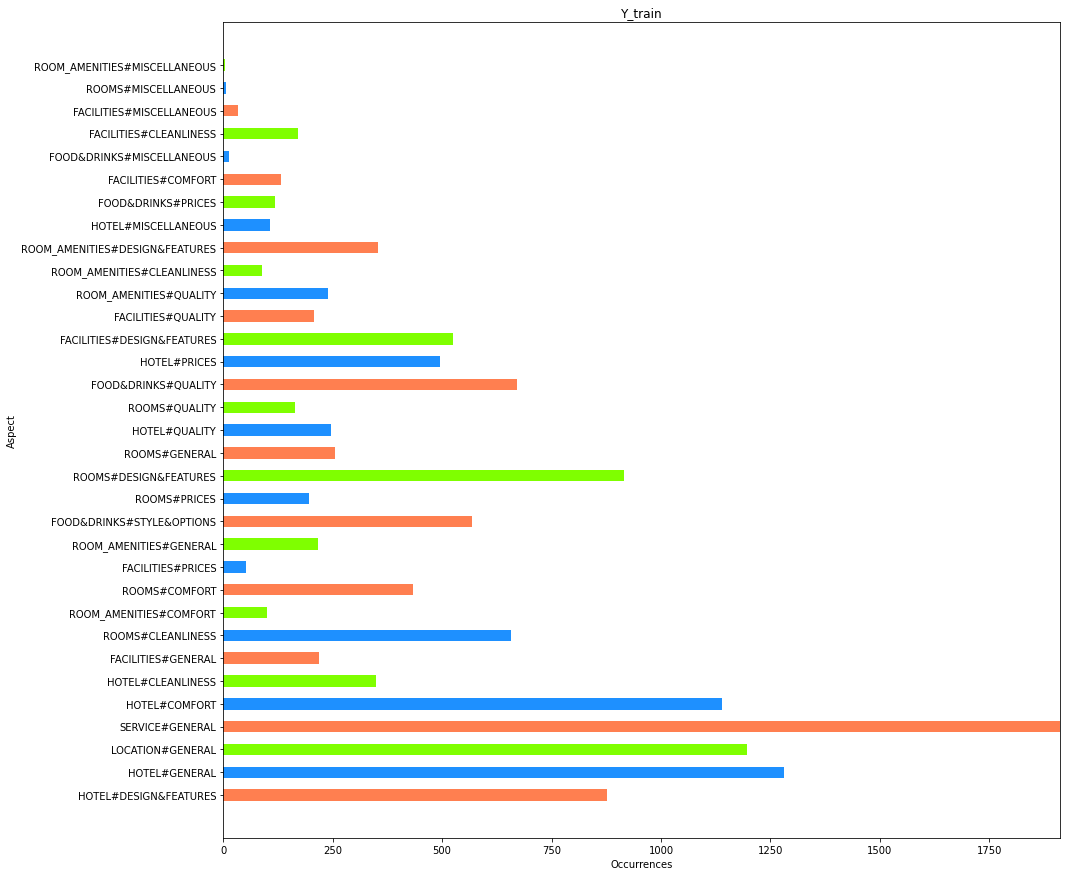

Label ROOM_AMENITIES#MISCELLANEOUS with min occurrences 3
Label SERVICE#GENERAL with max occurrences 1912


In [343]:
Count_Number_Of_Occurrences(y_train, "Y_train")

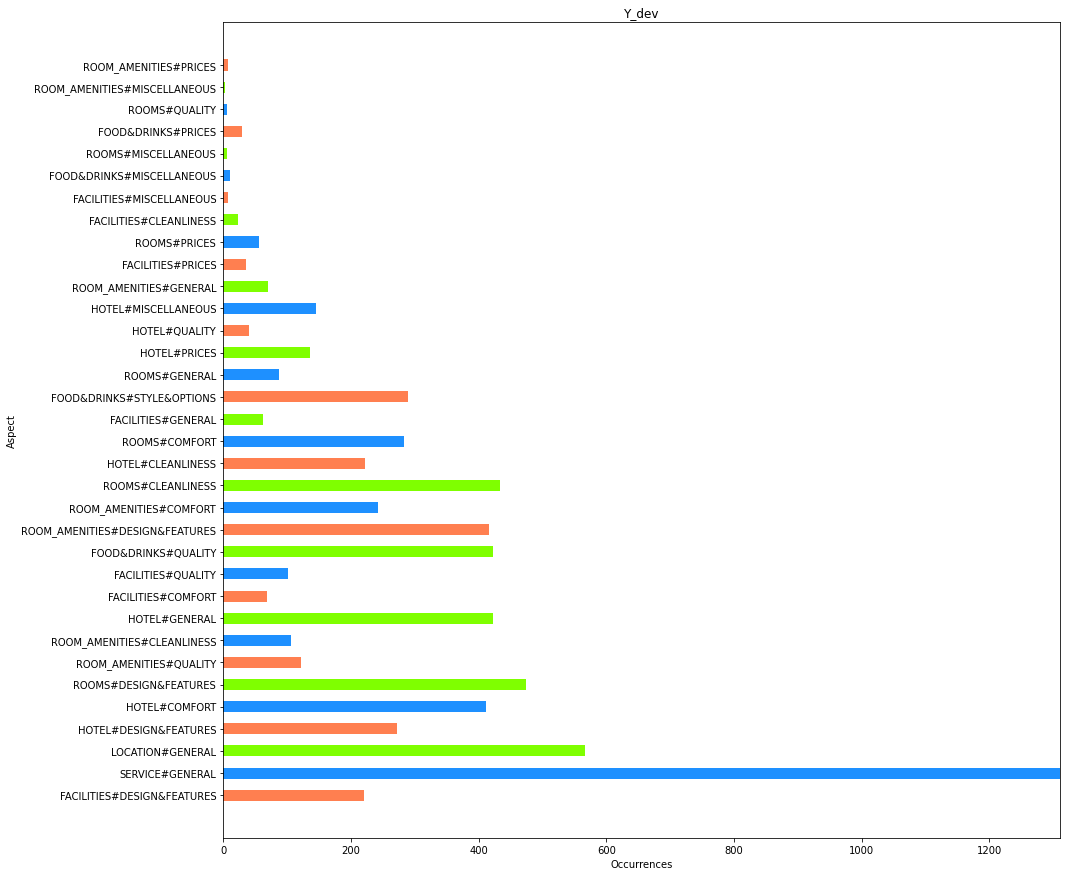

Label ROOM_AMENITIES#MISCELLANEOUS with min occurrences 3
Label SERVICE#GENERAL with max occurrences 1311


In [344]:
Count_Number_Of_Occurrences(y_dev, "Y_dev")

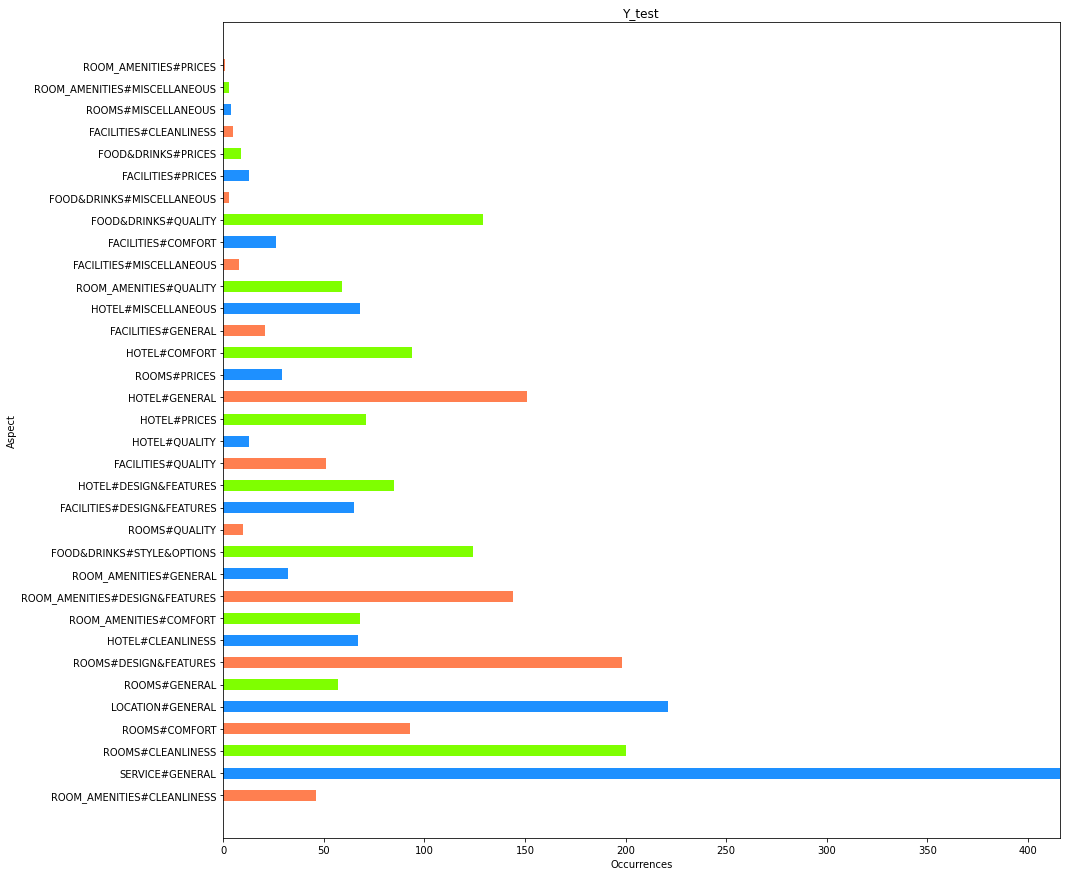

Label ROOM_AMENITIES#PRICES with min occurrences 1
Label SERVICE#GENERAL with max occurrences 416


In [345]:
Count_Number_Of_Occurrences(y_test, "Y_test")

###3.2.3 The proportion of the opinion polarity

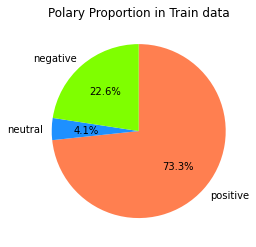

In [347]:
Count_Number_Of_Polarity(y_train, "Polary Proportion in Train data")

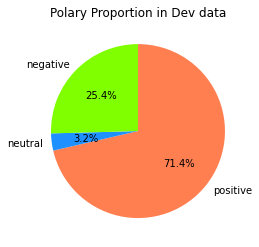

In [348]:
Count_Number_Of_Polarity(y_dev, "Polary Proportion in Dev data")

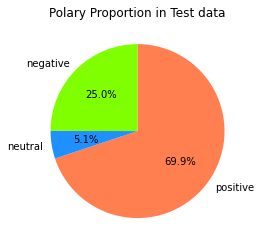

In [349]:
Count_Number_Of_Polarity(y_test, "Polary Proportion in Test data")

In [33]:
preproceesing_data = make_pipeline(lower_text,
                              delete_emoji,
                              replace_symbol,
                              delete_special_character,
                              normalize_elongate_words,
                              replace_negative_words,
                              token_postag,
                              ).fit(X_train)

In [34]:
X_train_preprocess = preproceesing_data.transform(X_train)
X_dev_preprocess = preproceesing_data.transform(X_dev)
X_test_preprocess = preproceesing_data.transform(X_test)

In [35]:
def prepare_data_aspect(X_preprocess,y,list_label):

  list_get = ["V", "N", "A"]
  X = []
  for i in X_preprocess:
    temp = ""
    for index , value in enumerate(i[1]):
      if value in list_get:
        temp+=i[0][index]+ " "
    X.append(temp)
  
  data = make_data_frame(X,y,list_label)

  X_aspect, y_aspect = getdata(data, list_label, "aspect")


  dic = {
      "X_aspect":X_aspect,

      "y_aspect": y_aspect,

      }
  return dic

In [36]:
train_aspect = prepare_data_aspect(X_train_preprocess,y_train,list_label)
dev_aspect  = prepare_data_aspect(X_dev_preprocess,y_dev,list_label)
test_aspect  = prepare_data_aspect(X_test_preprocess,y_test,list_label)


##3.3 Aspect

In [37]:
tf_aspect = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,3), stop_words='english').fit(train_aspect["X_aspect"])                    

In [38]:
X_train_aspect_tf = tf_aspect.transform(train_aspect["X_aspect"]).toarray()

X_dev_aspect_tf  = tf_aspect.transform(dev_aspect["X_aspect"]).toarray()

X_test_aspect_tf  = tf_aspect.transform(test_aspect["X_aspect"]).toarray()

In [39]:
from sklearn import metrics

def score(y_true, y_pred):
  print("Precison: ",metrics.precision_score(y_true, y_pred, average='micro'))
  print("Recall: ",metrics.recall_score(y_true, y_pred, average='micro'))
  print("F1: ",metrics.f1_score(y_true, y_pred, average='micro'))


## 3.4 Model

####3.4.1 Giai đoạn 1

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf_aspect = OneVsRestClassifier(LinearSVC(penalty="l2",dual=True,tol=1e-4,C=1.0,max_iter=1000,loss='squared_hinge',multi_class="ovr"), n_jobs=1)      

In [41]:
clf_aspect.fit(X_train_aspect_tf, train_aspect["y_aspect"])

Result_phase_1_train = clf_aspect.predict(X_train_aspect_tf)
Result_phase_1_dev = clf_aspect.predict(X_dev_aspect_tf)
Result_phase_1_test = clf_aspect.predict(X_test_aspect_tf)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 31 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


In [42]:
score(dev_aspect["y_aspect"],Result_phase_1_dev)

Precison:  0.7982995658465991
Recall:  0.6205878216847138
F1:  0.6983147400901969


In [43]:
score(test_aspect["y_aspect"],Result_phase_1_test)

Precison:  0.8000999500249875
Recall:  0.6195820433436533
F1:  0.6983642311886586


####3.4.2 Giai đoạn 2

In [44]:
def prepare_data_polarity(X_preprocess,y,list_label,Result_phase_1):

  list_get = ["V", "N", "A"]
  X = []
  count_pos_feature = []
  for i in X_preprocess:
    temp = ""
    count_verb = 0
    count_noun = 0
    count_adj = 0
    for index , value in enumerate(i[1]):
      if value == "V":
        temp+=i[0][index]+ " "
        count_verb +=1
      if value =="N":
        temp+=i[0][index]+ " "
        count_noun +=1
      if value =="A":
        temp+=i[0][index]+ " "
        count_adj +=1
    X.append(temp)
    count_pos_feature.append([count_verb,count_noun,count_adj])

  count_pos_feature = np.array(count_pos_feature)

  count_of_hagtag =  np.sum(Result_phase_1,axis=1)


  df = pd.DataFrame()
  df["count_hagatg"] = count_of_hagtag
  df["count_pos_verb"] = count_pos_feature[:,0]
  df["count_pos_noun"] = count_pos_feature[:,1]
  df["count_pos_adj"] = count_pos_feature[:,2]

  data = make_data_frame(X,y,list_label)


  X_positive, y_positive = getdata(data, list_label, "positive")
  X_negative, y_negative = getdata(data, list_label, "negative")
  X_neutral, y_neutral = getdata(data, list_label, "neutral")


  dic = {
      "review":X_positive,
      "feature_categori":df,
      "y_positive": y_positive,
      "y_negative":y_negative,
      'y_neutral':y_neutral
  }
  return dic


In [45]:
train_polarity = prepare_data_polarity(X_train_preprocess, y_train, list_label, Result_phase_1_train)
dev_polarity  = prepare_data_polarity(X_dev_preprocess, y_dev, list_label, Result_phase_1_dev)
test_polarity  = prepare_data_polarity(X_test_preprocess, y_test, list_label, Result_phase_1_test)

In [46]:
review_train_polarity = train_polarity["review"]
review_dev_polarity = dev_polarity["review"]
review_test_polarity = test_polarity["review"]

In [47]:
tf_polarity = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(2,3), stop_words='english').fit(review_train_polarity)

review_train_polarity_tf = tf_polarity.transform(review_train_polarity).toarray()

review_dev_polarity_tf  = tf_polarity.transform(review_dev_polarity).toarray()

review_test_polarity_tf  = tf_polarity.transform(review_test_polarity).toarray()

In [48]:
X_train_polarity_tf = np.hstack((review_train_polarity_tf,train_polarity["feature_categori"]))
X_dev_polarity_tf = np.hstack((review_dev_polarity_tf,dev_polarity["feature_categori"]))
X_test_polarity_tf = np.hstack((review_test_polarity_tf,test_polarity["feature_categori"]))

In [49]:
clf_positive = OneVsRestClassifier(LinearSVC(penalty="l2",dual=True,tol=1e-4,C=1.0,max_iter=1000,loss='squared_hinge',multi_class="ovr"), n_jobs=1)         
clf_negative = OneVsRestClassifier(LinearSVC(penalty="l2",dual=True,tol=1e-4,C=1.0,max_iter=1000,loss='squared_hinge',multi_class="ovr"), n_jobs=1)
clf_neutral = OneVsRestClassifier(LinearSVC(penalty="l2",dual=True,tol=1e-4,C=1.0,max_iter=1000,loss='squared_hinge',multi_class="ovr"), n_jobs=1)   

In [50]:
import warnings
warnings.filterwarnings('ignore')

clf_positive.fit(review_train_polarity_tf,train_polarity["y_positive"])
clf_negative.fit(review_train_polarity_tf,train_polarity["y_negative"])
clf_neutral.fit(review_train_polarity_tf,train_polarity["y_neutral"])


OneVsRestClassifier(estimator=LinearSVC(), n_jobs=1)

In [51]:
predict_positive = clf_positive.predict(review_dev_polarity_tf)
predict_negative = clf_negative.predict(review_dev_polarity_tf)
predict_neutral = clf_neutral.predict(review_dev_polarity_tf)

In [52]:
pos = 6
print(Result_phase_1_dev[pos])
print(predict_positive[pos])
print(predict_negative[pos])
print(predict_neutral[pos])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
pred =[]
for i in range(2000):
  rs = show_label_SA(Result_phase_1_dev[i],predict_positive[i],predict_negative[i],predict_neutral[i])
  pred.append(rs)


## 3.5 Predict in dev-dataset

In [54]:
_,_, y_true = separate_label(y_dev)
y_true_tf = transform_label_SA.transform(y_true)
pre_tf = transform_label_SA.transform(pred)

In [55]:
score(y_true_tf,pre_tf)

Precison:  0.7765659083826737
Recall:  0.35044297567149485
F1:  0.4829457364341085
